<a href="https://colab.research.google.com/github/Eng-Emmy/YoloV8_Nesne_Tespiti/blob/main/Proje_YOLOv8_Tabanl%C4%B1_Nesne_Tespiti_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proje Raporu: YOLOv8 Tabanlı Nesne Tespiti ve PyQt5 Görsel Arayüz Uygulaması**

* Adınız: **Emmanuel**
* Soyadınız: **HAKIRUWIZERA**
* Okul Numaranız: **2440631002**
* GitHub Repo Bağlantısı:

# **Proje Açıklaması**

Bu projede, YOLOv8 framework’ü kullanılarak nesne tespiti yapan bir model geliştirilmiş ve PyQt5 tabanlı bir grafiksel kullanıcı arayüzüne (GUI) entegre edilmiştir. Modelin eğitimi için iki farklı sınıfa (Elma ve Portakal) ait toplam 200 adet yüksek çözünürlüklü (>1920 piksel) görüntü kullanılmış, bu görüntüler telefon kamerası ile çekilmiş ve model uyumluluğu için 640 piksele yeniden ölçeklendirilmiştir. Görseller, YOLOv8 formatına uygun olacak şekilde bir etiketleme uygulaması kullanılarak etiketlenmiştir. Veri seti hazırlandıktan sonra YOLOv8 modeli konfigüre edilmiş ve eğitilmiş, başarı metrikleri olarak mAP ve kayıp (loss) grafikleri raporlanmıştır. En iyi performans gösteren model ağırlıkları (best.pt) kaydedilmiştir. PyQt5 ile geliştirilen masaüstü arayüz, kullanıcıların bir görüntü yüklemesine, bu görüntü üzerinde tespit edilen nesnelerin bounding box’lar ile gösterilmesine ve tespit edilen sınıfların ve sayılarının listelenmesine olanak sağlamaktadır. Bu çalışma, veri seti oluşturma ve model eğitimi aşamalarından, gerçek zamanlı nesne tespitini kullanıcı dostu bir uygulama üzerinden sunmaya kadar olan süreci kapsamaktadır.

##ETİKETLEME
**Program: LabelImg**

To start labeling, open LabelImg and select the image folder by clicking Open Dir. Then, set the directory where labels will be saved by going to File → Change Save Dir and create a new folder named labels. Enable Auto Save Mode under the View menu to ensure labels are saved automatically. Switch to YOLO format (instead of PascalVOC) by selecting File → PascalVOC and changing it to YOLO. For each image, draw a bounding box around  apple and orange  and enter the class name in the left panel (use 0 and 1 for two classes).



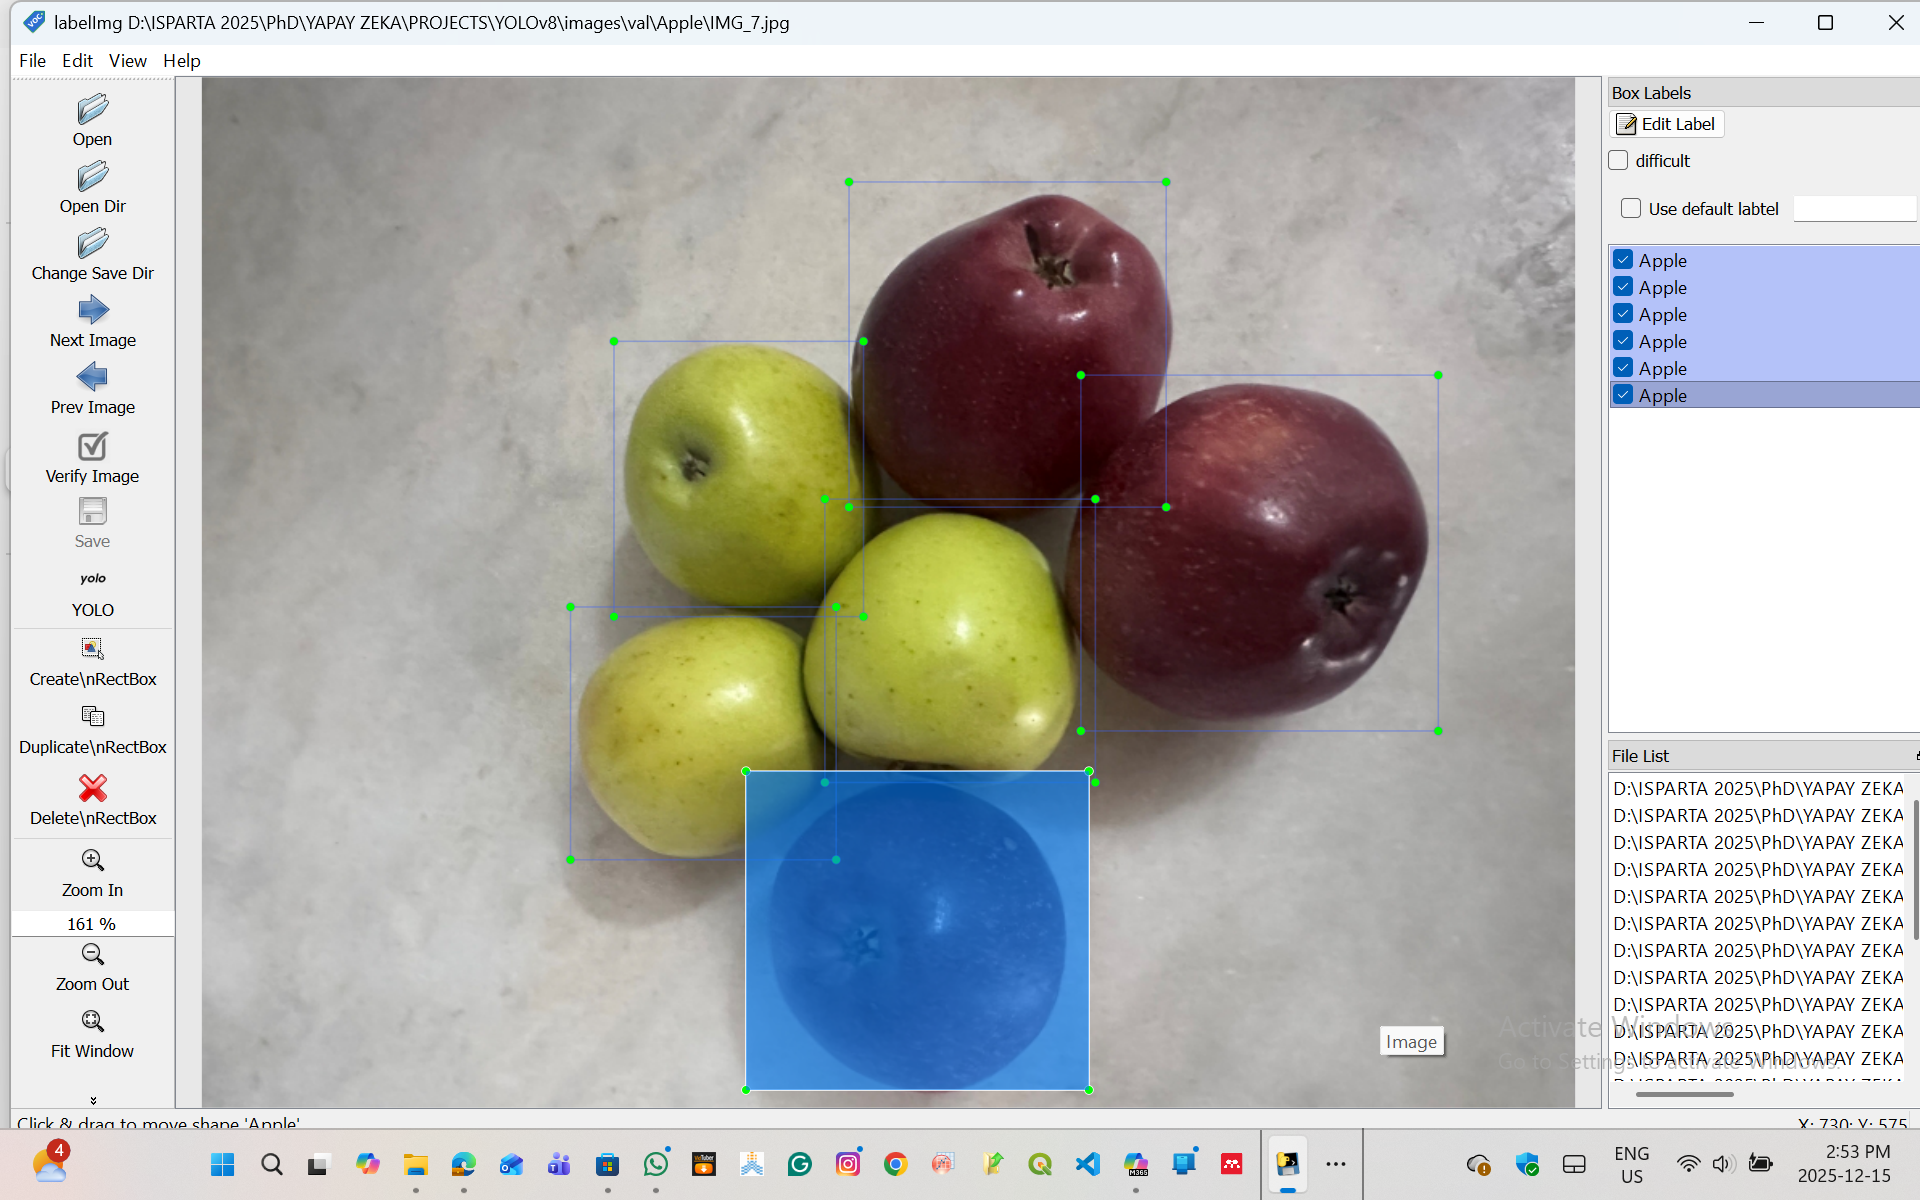

##MİMARİ

Model: YOLOv8 (Ultralytics)
Colab üzerinde kurulumu ve eğitimi kulanılmıştır.
Eğitilmiş modellerle transfer öğrenme yapmak basit.

## Etiket ve görüntü klasörlerini Google Drive'a atalım
* Ensure the YOLOv8 dataset structure is correct before uploading to Google Drive:
* dataset (images: train and valid; Labels:train and valid)


##YOLOV8 kurulumu
* Ultralytics, YOLOv8’in geliştiricisi ve resmi bakım sağlayıcısıdır; kodları, modelleri ve araçları sunarak YOLOv8’in eğitilmesini ve dağıtılmasını kolay ve verimli hale getirir.

In [ ]:
# YOLOv8 kurulumu
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.5 MB/s eta 0:00:00


## Drive Bağlantısı ve Dataset Yolunu Tanımlama


In [ ]:
# Google Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')

# Dataset yolu
dataset_path = '/content/drive/Mydrive/Colab_yolo/fruits'

Mounted at /content/drive


## data.yaml dosyasını oluştur
YOLOv8 eğitim sürecinde data.yaml dosyası, veri kümesinin yapılandırılmasında kritik bir rol üstlenmektedir. Bu dosya, modelin eğitim ve doğrulama aşamalarında kullanılacak görüntülerin ve etiketlerin konumlarını tanımlamakla birlikte, sınıf isimlerini de belirtir. Başka bir deyişle, data.yaml dosyası, YOLOv8’in veri kümesine erişimini ve sınıfların doğru şekilde yorumlanmasını sağlayan temel yapılandırma bileşenidir.

In [ ]:
# Writing YAML content
import yaml
import os # Import the os module

data = {
    'path': '/content/drive/MyDrive/Colab_yolo/fruits',
    'train': 'images/train',
    'val': 'images/val',
    'names': ['Apple', 'Orange'],
    'nc': 2,  # Number of classes
    'class_names': ['Apple', 'Orange']
}

yaml_path = '/content/drive/MyDrive/Colab_yolo/fruits/data.yaml'

# Ensure the directory exists before writing the file
os.makedirs(os.path.dirname(yaml_path), exist_ok=True)

with open(yaml_path, 'w') as file:
    yaml.dump(data, file)


## EĞİTİM
Eğitim ilerledikçe en iyi ağırlıkları (best.pt) kaydedecek.

In [ ]:
!yolo task=detect mode=train \
    model=yolov8s.pt \
    data='/content/drive/MyDrive/Colab_yolo/fruits/data.yaml' \
    epochs=10 \
    imgsz=640 \
    batch=16 \
    optimizer=AdamW \
    lr0=0.001 \
    lrf=0.1 \
    momentum=0.937 \
    weight_decay=0.0001 \
    warmup_epochs=3.0 \
    patience=30 \
    dropout=0.1 \
    hsv_h=0.015 \
    hsv_s=0.7 \
    hsv_v=0.4 \
    degrees=0.0 \
    scale=0.5 \
    shear=0.0 \
    perspective=0.0 \
    flipud=0.0 \



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab_yolo/fruits/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=F

In [ ]:
import os

val_images_path = '/content/drive/MyDrive/Colab_yolo/fruits/images/val'
if os.path.exists(val_images_path):
    print(f"Directory exists: {val_images_path}")
    # Optionally, list some contents
    # print(os.listdir(val_images_path)[:5])
else:
    print(f"Directory does NOT exist: {val_images_path}")
    print("Please ensure your dataset is properly structured in Google Drive with validation images in this path.")

Directory exists: /content/drive/MyDrive/Colab_yolo/fruits/images/val


##PERFORMANS
Drive'ın soldaki dosyalar bölümüne baktığımızda üretilen performans metriklerini indirdi.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Üretilen Best.pt dosyaları hangileri?

In [ ]:
import os

root_path = '/content/runs/detect/'

best_models = []
for folder in os.listdir(root_path):
    if folder.startswith('train'):
        best_path = os.path.join(root_path, folder, 'weights', 'best.pt')
        if os.path.exists(best_path):
            best_models.append(best_path)

print("Best.pt dosyaları:")
for model in best_models:
    print(model)


Best.pt dosyaları:
/content/runs/detect/train/weights/best.pt


##Gerçek görüntü üzerinde test et


image 1/1 /content/drive/MyDrive/Colab_yolo/fruits/Orange test1.jpeg: 640x640 2 Oranges, 16.3ms
Speed: 2.7ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


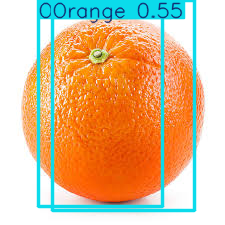

In [ ]:
from ultralytics import YOLO

# Eğitilmiş modeli yükle
model = YOLO('runs/detect/train/weights/best.pt')

# Örnek görüntü üzerinde tahmin yap, sonuçlar runs/detect/predict içine kaydedildi.
results = model.predict('/content/drive/MyDrive/Colab_yolo/fruits/Orange test1.jpeg', save=True)
results[0].show()



image 1/1 /content/drive/MyDrive/Colab_yolo/fruits/Orange test2.jpeg: 608x640 1 Orange, 45.2ms
Speed: 2.8ms preprocess, 45.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)
Results saved to /content/runs/detect/predict2


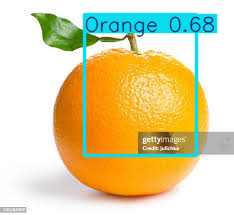

In [ ]:
results = model.predict('/content/drive/MyDrive/Colab_yolo/fruits/Orange test2.jpeg', save=True)
results[0].show()

REFERENCE


Wang, H., Liu, C., Cai, Y., Chen, L., & Li, Y. (2024). YOLOv8-QSD: An improved small object detection algorithm for autonomous vehicles based on YOLOv8. IEEE Transactions on Instrumentation and Measurement, 73, 1-16.

Büyükgökoğlan, E., & Uğuz, S. (2025). Development of a Performance Evaluation System in Turkish Folk Dance Using Deep Learning-Based Pose Estimation. Tehnički vjesnik, 32(5), 1817-1824.

Sai, J. M., Priyadarshini, G. I., Goud, G. P., Varma, D. H. V. S., Pitchai, R., & Jyothirmai, D. (2024, June). Smart and sustainable framework for Maize Leaf Disease Prediction using Deep Learning Techniques. In 2024 First International Conference on Technological Innovations and Advance Computing (TIACOMP) (pp. 467-471). IEEE.


Paewboontra, W., & Nimsuk, N. (2024). Detecting Multi-scale Rose Apple Skin and Defects Using Instance Segmentation with Anchors Optimization. IEEE Access.

